In [ ]:
# Read the dataset into the Pandas DataFrame!
import pandas as pd
df = pd.read_csv("results.csv")
#Does the dataset include any missing values? If so, delete the missing values’ entries!
df.dropna()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False


In [4]:
# Exploring the Dataset
# Answer the following questions about the dataset using Python commands:
# How many tuples are there in the dataset?
len(df)

42650

In [5]:
# How many tournaments are there in the dataset?
len(df.tournament.unique())

120

In [6]:
# Convert and Deduce
# Convert the column date to timestamps!
df['date'] = pd.to_datetime(df['date'])
# Find out how many matches in the dataset were played in 2018.
# HINT: use the Date Column
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2018-12-31')
df[(df['date'] >= start_date) & (df['date'] <= end_date)]
#df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df.dtypes


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [7]:
# Team Statistics
# Calculate how many times the home team won, lost, or had a draw.
homeWins = 0
homeLosses = 0
homeDraws = 0
for i in range(len(df)):
   if df['home_score'].loc[i] > df['away_score'].loc[i]:
      homeWins += 1
   elif df['home_score'].loc[i] < df['away_score'].loc[i]:
      homeLosses += 1
   else:
      homeDraws += 1
homeStats = [homeWins, homeLosses, homeDraws]
print(homeStats)

[20739, 12074, 9837]


([<matplotlib.patches.Wedge at 0x2b937a7b290>,
 [Text(0.04746637221253046, 1.0989754062348174, 'Home Wins'),
  Text(-0.7639751740114014, -0.7914176732258695, 'Home Losses'),
  Text(0.8236470240463938, -0.7291128717691929, 'Home Draws')])

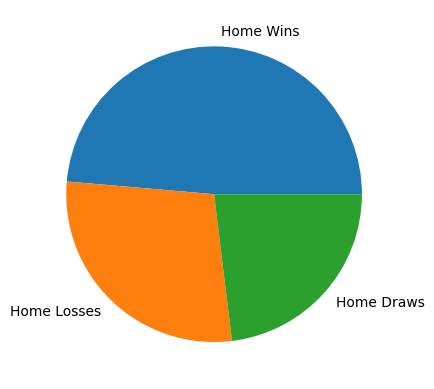

In [8]:
# Plot the numbers extracted from Step 5 in a pie chart.
import matplotlib.pyplot as plt

myLabels = ["Home Wins", "Home Losses", "Home Draws"]
plt.pie(homeStats, labels = myLabels)


<Axes: ylabel='count'>

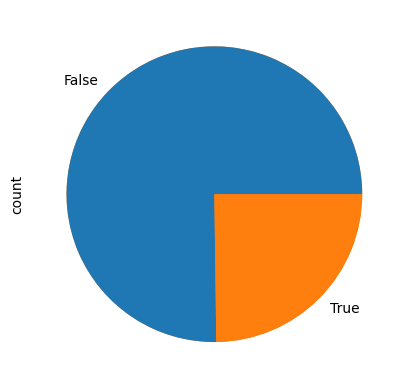

In [ ]:
# Plot the neutral column as a pie chart.
# in one line
df['neutral'].value_counts().plot.pie()

In [35]:
# How many unique teams are there in the dataset?
combine_teams = pd.concat([df['home_team'], df['away_team']])
len(combine_teams.unique())

313